## 梯度下降
$$f(x_1,x_2) = (1-x_1)^2 + 100(x_2-x^2_1)^2

假设存在函数:
$$f(x) = x^4 - 3*x^3 + 2$$
其导数(derivate)为：
$$f'(x)=4x^3 - 9x^2$$
其最小值x值可由:
$$4x^3 - 9x^2=0$$
得:
$$x=\frac{9}{4}$$

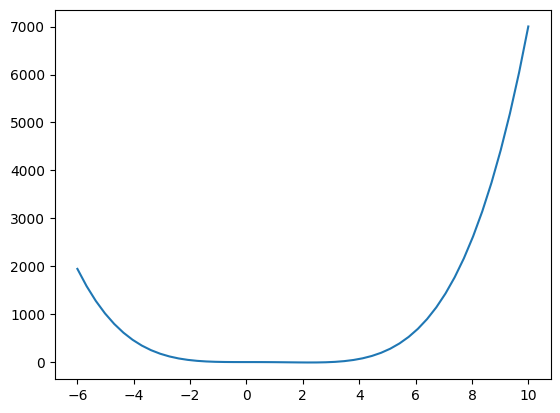

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
def f(x): 
   return x**4- 3*(x**3) + 2

x = np.linspace(-6, 10)
y = f(x)
plt.plot(x,y)


In [ ]:
next_x = 6# We start the search at x = 6
gamma = 0.01# Step size multiplier
precision = 0.00001# Desired precision of result
max_iters = 10000# Maximum number of iterations
# Derivative
#function
def df(x):
    return 4 * x ** 3 - 9 * x ** 2

for i in range(max_iters):
    current_x = next_x
    next_x = current_x - gamma * df(current_x)
    print(i, next_x, df(current_x))
    step = next_x - current_x
    if abs(step) <= precision:
        break
print("Minimum at ", next_x)

## 数据集划分

## 特征正则化

## Python Scikit-learn
normalise: 把特征缩放到0,1范围之内
regularization: 加惩罚性，L1,L2惩罚性

## 逻辑斯蒂回归(logistic regression)

[-6.         -5.75510204 -5.51020408 -5.26530612 -5.02040816 -4.7755102
 -4.53061224 -4.28571429 -4.04081633 -3.79591837 -3.55102041 -3.30612245
 -3.06122449 -2.81632653 -2.57142857 -2.32653061 -2.08163265 -1.83673469
 -1.59183673 -1.34693878 -1.10204082 -0.85714286 -0.6122449  -0.36734694
 -0.12244898  0.12244898  0.36734694  0.6122449   0.85714286  1.10204082
  1.34693878  1.59183673  1.83673469  2.08163265  2.32653061  2.57142857
  2.81632653  3.06122449  3.30612245  3.55102041  3.79591837  4.04081633
  4.28571429  4.53061224  4.7755102   5.02040816  5.26530612  5.51020408
  5.75510204  6.        ] [0.00247262 0.00315659 0.00402898 0.00514124 0.00655853 0.00836325
 0.01065923 0.01357692 0.01727929 0.0219688  0.02789489 0.03536175
 0.04473535 0.05644827 0.07100002 0.08894941 0.11089489 0.13743793
 0.16912564 0.2063713  0.2493577  0.29793663 0.35154728 0.40918225
 0.46942595 0.53057405 0.59081775 0.64845272 0.70206337 0.7506423
 0.7936287  0.83087436 0.86256207 0.88910511 0.91105059 0

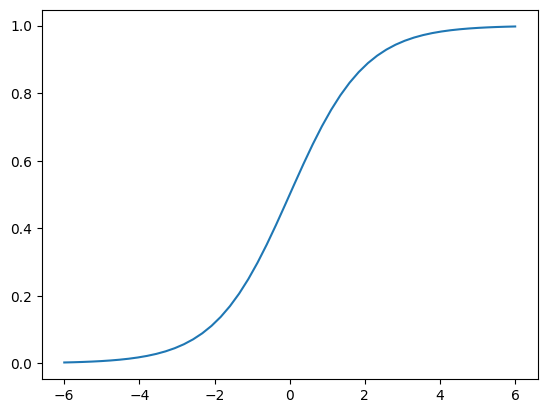

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
x = np.linspace(-6, 6)
z = 1/(1 + np.exp(-x))
print(x, z, ' x, z')
plt.plot(x,z)

In [1]:
# coding: utf-8

import numpy as np 
import matplotlib.pyplot as plt
import h5py
import scipy
from sklearn import datasets

# 加载数据并简单划分为训练集/测试集
def load_dataset():
    dataset = datasets.load_breast_cancer()  
    train_x,train_y = dataset['data'][0:400], dataset['target'][0:400]
    test_x, test_y = dataset['data'][400:-1], dataset['target'][400:-1]
    return train_x, train_y, test_x, test_y

# logit激活函数
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s
    
# 权重初始化0
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

# 定义学习的目标函数，计算梯度
def propagate(w, b, X, Y):
    m = X.shape[1]      
    A = sigmoid(np.dot(w.T, X) + b)         # 逻辑回归输出预测值  
    cost = -1 / m *  np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))   # 交叉熵损失为目标函数
    dw = 1 / m * np.dot(X, (A - Y).T)   # 计算权重w梯度
    db = 1 / m * np.sum(A - Y)   
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())    
    grads = {"dw": dw,
             "db": db}    
    return grads, cost

# 定义优化算法
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    costs = []    
    for i in range(num_iterations):    # 梯度下降迭代优化
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]              # 权重w梯度
        db = grads["db"]
        w = w - learning_rate * dw   # 按学习率(learning_rate)负梯度(dw)方向更新w
        b = b - learning_rate * db
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

#传入优化后的模型参数w，b，模型预测   
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    # 初始化
    w, b = initialize_with_zeros(X_train.shape[0]) 
    # 梯度下降优化模型参数
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    # 模型预测结果
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # 模型评估准确率
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}    
    return d
    
# 加载癌细胞数据集
train_set_x, train_set_y, test_set_x, test_set_y = load_dataset()   

# reshape
train_set_x = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x = test_set_x.reshape(test_set_x.shape[0], -1).T

print(train_set_x.shape)
print(test_set_x.shape)

#训练模型并评估准确率
paras = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 100, learning_rate = 0.001, print_cost = False)


(30, 400)
(30, 168)
train accuracy: 90.25 %
test accuracy: 91.07142857142857 %


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12368\2458362246.py:33: RuntimeWarning: divide by zero encountered in log
  cost = -1 / m *  np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))   # 交叉熵损失为目标函数
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12368\2458362246.py:33: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / m *  np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))   # 交叉熵损失为目标函数
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12368\2458362246.py:18: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))
